<a href="https://colab.research.google.com/github/RaoSharjeelKhan/Machine-Learning/blob/main/Cat_And_Dog_Classification_CNN_Transfer_Learning_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import pathlib
import PIL
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [2]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
!pip install kaggle
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:10<00:00, 25.0MB/s]
100% 218M/218M [00:10<00:00, 21.7MB/s]


In [5]:
from zipfile import ZipFile
DT='/content/cat-and-dog.zip'
with ZipFile(DT, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
training_df="/content/training_set/training_set"
testing_df="/content/test_set/test_set"

In [22]:
image_size = (224, 224)
batch_size = 32

training_set = tf.keras.utils.image_dataset_from_directory(
    directory=training_df,
    validation_split=0.2,
    subset="training",
    class_names=['cats', 'dogs'],
    image_size=image_size,
    seed=123,
    batch_size=batch_size
)
val_set = tf.keras.utils.image_dataset_from_directory(
  directory=training_df,
  validation_split=0.2,
  subset="validation",
  seed=123,
  class_names=['cats', 'dogs'],
  image_size=image_size,
  batch_size=batch_size)

test_set = tf.keras.utils.image_dataset_from_directory(
    directory=testing_df,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size,   
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


#A Basic CNN Model

In [9]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_size[1], image_size[1], 3)) ,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

In [10]:
history=model.fit(training_set,
          validation_data=val_set,
          epochs=15
          )       

Epoch 1/15
201/201 [==============================] - 21s 59ms/step - loss: 0.6684 - accuracy: 0.5937 - val_loss: 0.5994 - val_accuracy: 0.6808
Epoch 2/15
201/201 [==============================] - 12s 61ms/step - loss: 0.5536 - accuracy: 0.7113 - val_loss: 0.5524 - val_accuracy: 0.7177
Epoch 3/15
201/201 [==============================] - 12s 57ms/step - loss: 0.4799 - accuracy: 0.7630 - val_loss: 0.5844 - val_accuracy: 0.7102
Epoch 4/15
201/201 [==============================] - 12s 56ms/step - loss: 0.3832 - accuracy: 0.8251 - val_loss: 0.5585 - val_accuracy: 0.7327
Epoch 5/15
201/201 [==============================] - 12s 58ms/step - loss: 0.2852 - accuracy: 0.8776 - val_loss: 0.6646 - val_accuracy: 0.7264
Epoch 6/15
201/201 [==============================] - 13s 63ms/step - loss: 0.1867 - accuracy: 0.9257 - val_loss: 0.8556 - val_accuracy: 0.7302
Epoch 7/15
201/201 [==============================] - 12s 57ms/step - loss: 0.1236 - accuracy: 0.9519 - val_loss: 1.0475 - val_accuracy:

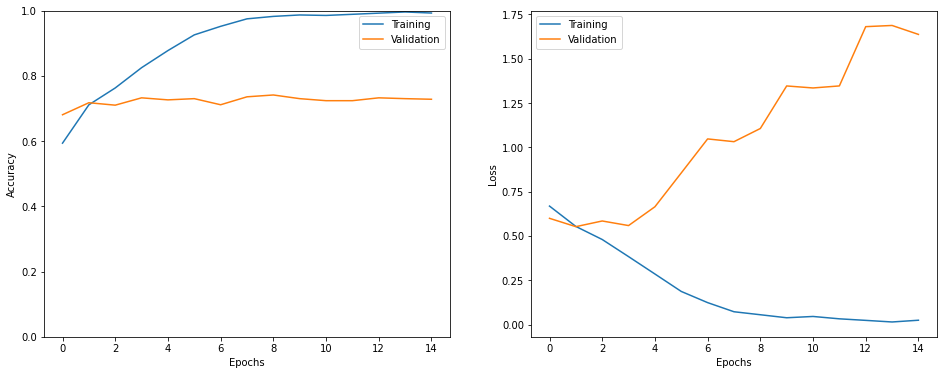

In [11]:
show_history(history) 

#Reducing Overfitting Using Data Augmentation

In [12]:
data_augmentation =tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical", input_shape=(image_size[1],image_size[1],3)),
  layers.RandomZoom(0.1),
  layers.RandomRotation(0.1),
])
resize_and_rescale = tf.keras.Sequential([
   layers.Rescaling(1./255)
])

In [14]:
model_aug = Sequential([ 
  layers.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(image_size, image_size, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model_aug.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history_aug=model_aug.fit(training_set,
          validation_data=val_set,
          epochs=15
          )       

Epoch 1/15
201/201 [==============================] - 19s 86ms/step - loss: 0.7116 - accuracy: 0.5167 - val_loss: 0.6923 - val_accuracy: 0.5091
Epoch 2/15
201/201 [==============================] - 17s 84ms/step - loss: 0.6864 - accuracy: 0.5595 - val_loss: 0.6779 - val_accuracy: 0.5397
Epoch 3/15
201/201 [==============================] - 18s 89ms/step - loss: 0.6418 - accuracy: 0.6287 - val_loss: 0.6316 - val_accuracy: 0.6608
Epoch 4/15
201/201 [==============================] - 17s 85ms/step - loss: 0.6043 - accuracy: 0.6755 - val_loss: 0.6007 - val_accuracy: 0.6914
Epoch 5/15
201/201 [==============================] - 21s 102ms/step - loss: 0.5849 - accuracy: 0.6886 - val_loss: 0.6350 - val_accuracy: 0.6621
Epoch 6/15
201/201 [==============================] - 18s 90ms/step - loss: 0.5656 - accuracy: 0.7033 - val_loss: 0.6170 - val_accuracy: 0.6852
Epoch 7/15
201/201 [==============================] - 19s 91ms/step - loss: 0.5644 - accuracy: 0.7053 - val_loss: 0.6130 - val_accuracy

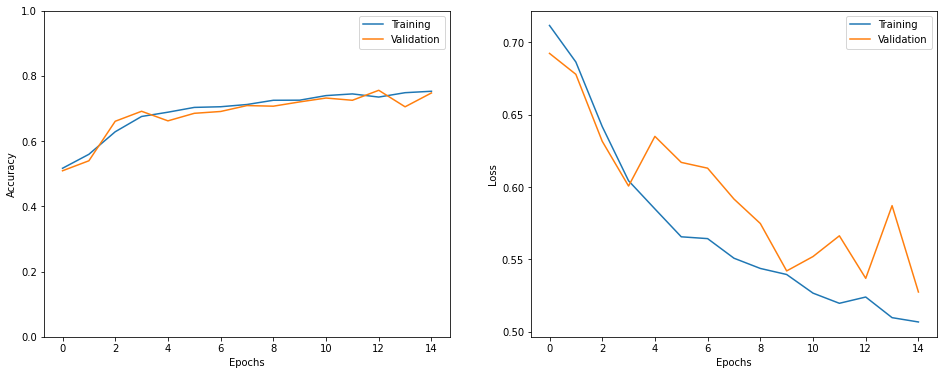

In [17]:
show_history(history_aug) 

#Using Pre_trained Model from tensorflow Hub to Further Increase the Accuracy

In [19]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

feature_extractor_model = mobilenet_v2

In [29]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

model_tf = tf.keras.Sequential([
  layers.Rescaling(1./255),
  feature_extractor_layer,
  tf.keras.layers.Dense(2,activation='softmax')
])

model_tf.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
history_tf= model_tf.fit(training_set,
          validation_data=val_set,
          epochs=6
          )       

Epoch 1/6
201/201 [==============================] - 17s 68ms/step - loss: 0.0835 - accuracy: 0.9705 - val_loss: 0.0410 - val_accuracy: 0.9881
Epoch 2/6
201/201 [==============================] - 15s 71ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 3/6
201/201 [==============================] - 14s 67ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0327 - val_accuracy: 0.9875
Epoch 4/6
201/201 [==============================] - 14s 67ms/step - loss: 0.0204 - accuracy: 0.9928 - val_loss: 0.0358 - val_accuracy: 0.9856
Epoch 5/6
201/201 [==============================] - 14s 66ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0315 - val_accuracy: 0.9881
Epoch 6/6
201/201 [==============================] - 14s 67ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0321 - val_accuracy: 0.9875


We got 98% ACCURACY on validation set...pretty cooool

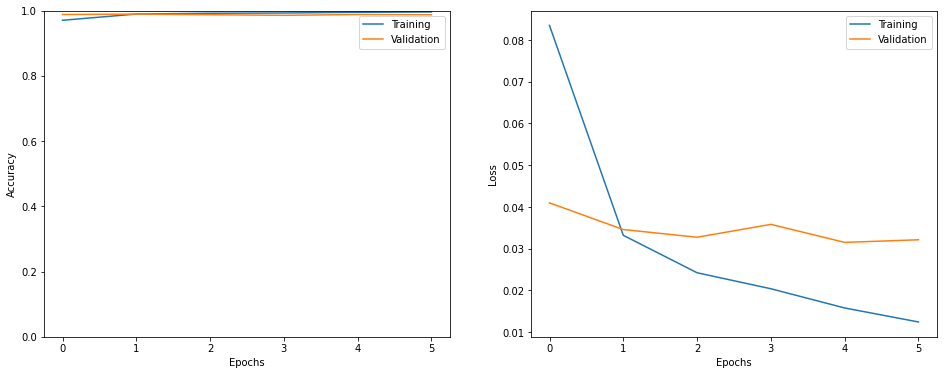

In [31]:
show_history(history_tf)